Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection & Analysis

In [ ]:
# Load the first Excel file
parkinsons_data1 = pd.read_excel('/content/high.xlsx')

# Load the second Excel file
parkinsons_data2 = pd.read_excel('/content/low.xlsx')

# Load the third Excel file
parkinsons_data3 = pd.read_excel('/content/mid.xlsx')


In [ ]:
# For the first DataFrame
print(parkinsons_data1.head())

# For the second DataFrame
print(parkinsons_data2.head())

# For the third DataFrame
print(parkinsons_data3.head())


              Time  AccX  AccY   AccZ  GyroX  GyroY  GyroZ
0  17:50:19.246000  5860  2764  19852  -1216  12444   3929
1  17:50:20.933000  1988 -4244  21744  -1200   6995   6911
2  17:50:21.027000  -332 -4840  13376  -1232   1203    127
3  17:50:21.168000 -3236 -9612   7960  -1200   -412   2135
4  17:50:21.261000   488 -3364  14576  -1200   -514  -1605
              Time  AccX  AccY   AccZ  GyroX  GyroY  GyroZ
0  17:58:25.760000 -3044  8120  19064   -976   -677   2920
1  17:58:25.901000 -2492  4576  17728   -928  -1850     37
2  17:58:25.995000 -3184  4440  16392   -960   1046   1301
3  17:58:26.135000 -3276  5332  16664   -960   1745   4382
4  17:58:26.229000 -5008  6276  17764   -928   2511   3163
              Time  AccX  AccY   AccZ  GyroX  GyroY  GyroZ
0  17:55:18.754000  1080  -456  16436  -1024  13476   2343
1  17:55:18.848000  1656   244  17172  -1008   7350   1002
2  17:55:18.941000   980   820  18404  -1040  -1188   1337
3  17:55:19.082000   536   448  19640  -1008  -3258   44

In [ ]:
# number of rows and columns in the dataframe
parkinsons_data1.shape

(1033, 7)

In [ ]:
# For the first DataFrame
print("Shape of parkinsons_data1:", parkinsons_data1.shape)

# For the second DataFrame
print("Shape of parkinsons_data2:", parkinsons_data2.shape)

# For the third DataFrame
print("Shape of parkinsons_data3:", parkinsons_data3.shape)


Shape of parkinsons_data1: (1033, 7)
Shape of parkinsons_data2: (1080, 7)
Shape of parkinsons_data3: (1080, 7)


In [ ]:
# checking for missing values in each column
parkinsons_data1.isnull().sum()
parkinsons_data2.isnull().sum()
parkinsons_data3.isnull().sum()

Time     0
AccX     0
AccY     0
AccZ     0
GyroX    0
GyroY    0
GyroZ    0
dtype: int64

In [ ]:
# getting some statistical measures about the data
parkinsons_data1.describe()
parkinsons_data2.describe()
parkinsons_data3.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,-1269.685185,1404.481481,10866.162963,-1014.059259,-14.027778,-184.565741
std,2695.902632,3502.975894,13100.768537,20.330454,3523.362894,4426.105490
min,-8564.000000,-13472.000000,-20672.000000,-1072.000000,-20607.000000,-23032.000000
25%,-2734.000000,-398.000000,14036.000000,-1024.000000,-1476.250000,-2393.500000
50%,-1498.000000,1684.000000,17176.000000,-1008.000000,145.000000,-199.000000
75%,-267.000000,3433.000000,18326.000000,-992.000000,1701.250000,1901.250000
max,13708.000000,11008.000000,26192.000000,-944.000000,17823.000000,22997.000000


In [ ]:
import pandas as pd

# Load the three Excel files
low_tremor_data = pd.read_excel('/content/low.xlsx')
mid_tremor_data = pd.read_excel('/content/mid.xlsx')
high_tremor_data = pd.read_excel('/content/high.xlsx')

# Add a 'status' column to each DataFrame with corresponding values
low_tremor_data['status'] = 'low'
mid_tremor_data['status'] = 'mid'
high_tremor_data['status'] = 'high'

# Concatenate the data frames
# Concatenate the data frames with inner join
combined_data = pd.concat([low_tremor_data, mid_tremor_data, high_tremor_data], ignore_index=True, join='inner')

combined_data.to_excel('/content/combined_data.xlsx', index=False)

# Check the distribution of the 'status' column
status_distribution = combined_data['status'].value_counts()

print("Distribution of status across all files:")
print(status_distribution)


Distribution of status across all files:
status
low     1080
mid     1080
high    1033
Name: count, dtype: int64


In [ ]:
grouped_data_mean = combined_data.groupby('status').mean()

# Display the grouped data
print(grouped_data_mean)


TypeError: unsupported operand type(s) for +: 'datetime.time' and 'datetime.time'

Data Pre-Processing

Separating the features & Target

In [ ]:
# Separating features and target variable
# Drop the first and 'status' column to obtain the feature matrix X
#import pandas as pd

#combined_data=pd.read_excel('/content/filtered_data (1).xlsx')
X = combined_data.drop(columns=['status'], axis=1).iloc[:, 1:]

Y = combined_data['status']  # Selecting only the 'status' column as target variable


In [ ]:
print(X)

      AccX   AccY   AccZ  GyroX  GyroY  GyroZ
0    -3044   8120  19064   -976   -677   2920
1    -2492   4576  17728   -928  -1850     37
2    -3184   4440  16392   -960   1046   1301
3    -3276   5332  16664   -960   1745   4382
4    -5008   6276  17764   -928   2511   3163
...    ...    ...    ...    ...    ...    ...
3188  -476   2996  14228  -1168  -3643  -3884
3189  1848   9188  25840  -1152  -1044  -1827
3190  4212  11652  20368  -1152   4095   4670
3191 -2924   1132  14476  -1152  -1704   2004
3192 -3468   4276  20920  -1136   1099   1969

[3193 rows x 6 columns]


In [ ]:
print(Y)

0        low
1        low
2        low
3        low
4        low
        ... 
3188    high
3189    high
3190    high
3191    high
3192    high
Name: status, Length: 3193, dtype: object


Splitting the data to training data & Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(3193, 6) (2554, 6) (639, 6)


Data Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
print(X_train)

[[ 1.26050817e-01 -3.88000167e-01  1.05314829e-03  3.78747227e-01
  -2.39411901e-01  2.37064600e-01]
 [ 1.06971742e+00 -5.73584523e-04 -1.77937670e+00 -1.56727032e+00
  -7.95099484e-01 -4.70766115e-01]
 [-2.28305621e-01  9.96108663e-02  2.33208498e-01  5.28440884e-01
   3.88591233e-02  8.39448782e-02]
 ...
 [-6.84732120e-01  3.10488626e-01  2.57668489e-01  3.78747227e-01
  -8.64625252e-02  2.45648585e-01]
 [-4.69036897e-01  7.69375446e-01  8.83758425e-01 -1.71696398e+00
  -1.09758037e+00 -2.15925905e+00]
 [-3.81410713e-01 -4.61119712e-02 -1.97630635e-01 -1.71696398e+00
  -3.47929056e-01  3.24760441e-01]]


Model Training

Support Vector Machine Model

In [ ]:
model = svm.SVC(kernel='linear')

In [ ]:
# training the SVM model with training data
model.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [ ]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.9651527016444792


In [ ]:
# accuracy score on training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [ ]:
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.9640062597809077


Building a Predictive System

In [ ]:
input_data = (-8080,3176,19084,-960,-1668,-279)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)




['low']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [ ]:
import pickle

In [ ]:
filename = 'parkinsom_model.sav'
pickle.dump(model,open(filename, 'wb'))

NameError: name 'pickle' is not defined

In [ ]:
for column in X.columns:
  print(column)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame 'df' containing your data with columns:
# AccX, AccY, AccZ, GyroX, GyroY, GyroZ, status
df=pd.read_excel('/content/combined_data.xlsx')
# Function to engineer temporal features
def engineer_temporal_features(data, window_size=5):
    # Calculate mean and standard deviation for each sensor over a sliding window
    data_mean = data.rolling(window=window_size).mean().dropna()
    data_std = data.rolling(window=window_size).std().dropna()

    # Combine mean and standard deviation into feature vectors
    features = pd.concat([data_mean, data_std], axis=1)
    return features

# Split data into features and target
X = df[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']]
y = df['status']

# Engineer temporal features
# Engineer temporal features
X_temporal = engineer_temporal_features(X)

# Reindex y to match the indices of X_temporal
y_reindexed = y[X_temporal.index]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_temporal, y_reindexed, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM classifier with RBF kernel
svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9937304075235109


In [ ]:
# Assuming you have trained SVM classifier 'svm_classifier' and scaler 'scaler'

# Function to preprocess input data and make predictions
def predict_parkinson_level(input_data):
    # Engineer temporal features for input data
    input_temporal = engineer_temporal_features(input_data)

    # Standardize input features
    input_scaled = scaler.transform(input_temporal)

    # Make predictions
    predictions = svm_classifier.predict(input_scaled)

    return predictions

# Example input data (replace this with your own input data)
input_data = pd.DataFrame({
    'AccX': [-3044, -2492, -3184, -3276, -5008],
    'AccY': [8120, 4576, 4440, 5332, 6276],
    'AccZ': [19064, 17728, 16392, 16664, 17764],
    'GyroX': [-976, -928, -960, -960, -928],
    'GyroY': [-677, -1850, 1046, 1745, 2511],
    'GyroZ': [2920, 37, 1301, 4382, 3163]
})

# Make predictions
predictions = predict_parkinson_level(input_data)
print("Predictions:", predictions)


Predictions: ['low']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Read data
df = pd.read_excel('/content/combined_data.xlsx')

# Extract sensor data (features) and tremor levels (target)
X = df[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']]
y = df['status'].map({'low': 0, 'mid': 1, 'high': 2})  # Map tremor levels to numerical values

# Check the dimensions of X and y
print("Number of samples in X:", X.shape[0])
print("Number of samples in y:", y.shape[0])

# Ensure X and y have the same number of samples
if X.shape[0] != y.shape[0]:
    # Handle inconsistency, e.g., remove or add samples
    pass

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM classifier with RBF kernel
svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Number of samples in X: 3193
Number of samples in y: 3193
Accuracy: 0.97339593114241


In [ ]:
filename = 'parkinsom_model_6.sav'
pickle.dump(svm_classifier,open(filename, 'wb'))

IndexError: index 3 is out of bounds for axis 1 with size 3

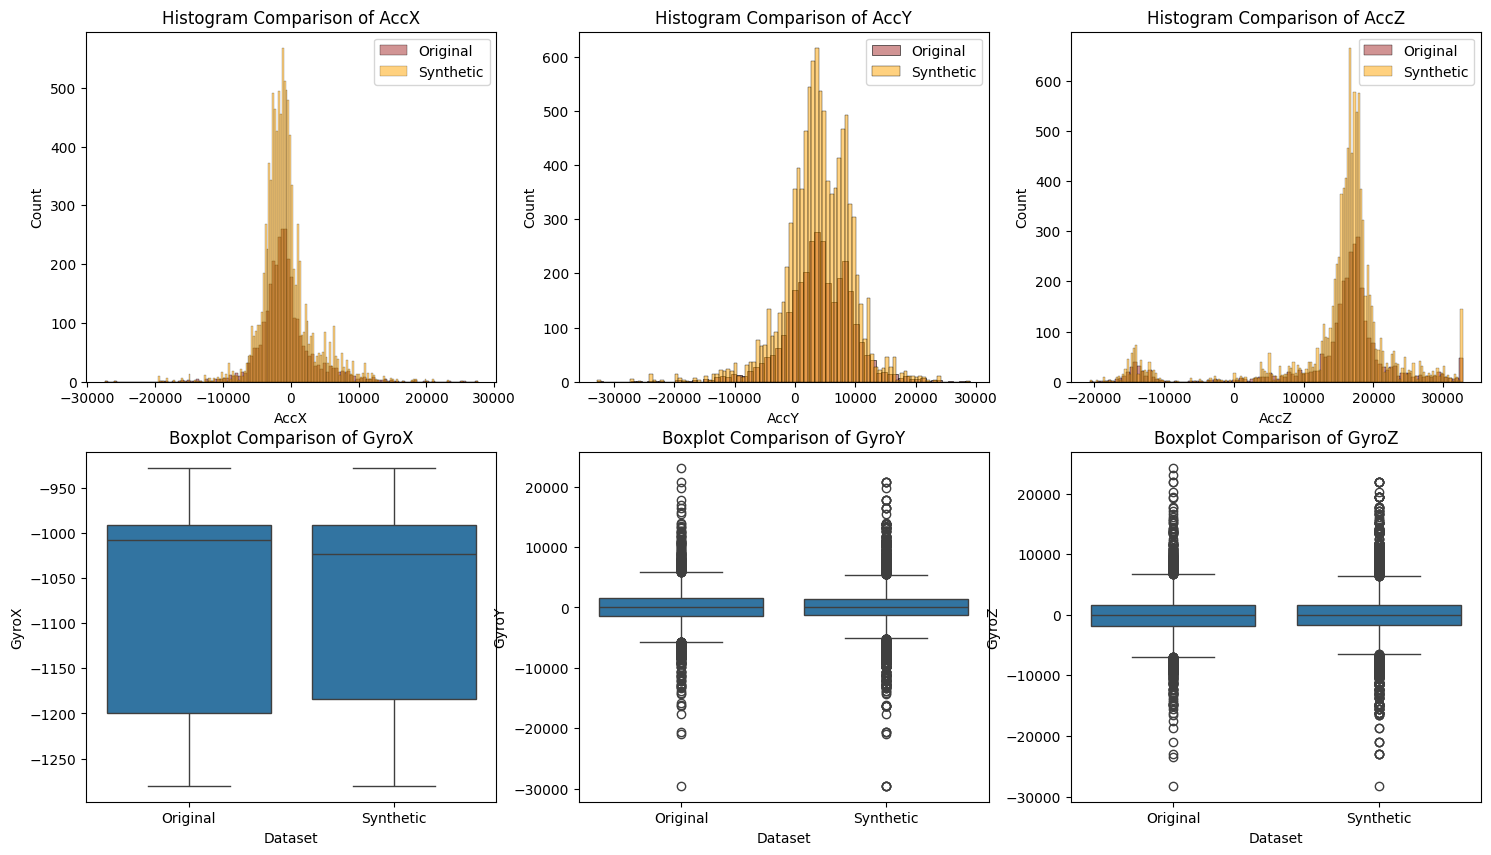

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load original and synthetic datasets
original_data = pd.read_excel("/content/combined_data_1.xlsx")
synthetic_data = pd.read_excel("/content/generated_samples.xlsx")

# Statistical analysis
original_stats = original_data.describe()
synthetic_stats = synthetic_data.describe()

# Comparison plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Histogram comparison
for i, col in enumerate(['AccX', 'AccY', 'AccZ']):
    sns.histplot(original_data[col], ax=axes[0, i], color='brown', alpha=0.5, label='Original')
    sns.histplot(synthetic_data[col], ax=axes[0, i], color='orange', alpha=0.5, label='Synthetic')
    axes[0, i].set_title(f'Histogram Comparison of {col}')
    axes[0, i].legend()

# Boxplot comparison
for i, col in enumerate(['GyroX', 'GyroY', 'GyroZ']):
    sns.boxplot(data=pd.concat([original_data[[col]].assign(Dataset='Original'), synthetic_data[[col]].assign(Dataset='Synthetic')]),
                x='Dataset', y=col, ax=axes[1, i])
    axes[1, i].set_title(f'Boxplot Comparison of {col}')

# Scatter plot comparison
sns.scatterplot(data=original_data.sample(n=1000), x='AccX', y='AccY', ax=axes[1, 3], color='blue', alpha=0.5, label='Original')
sns.scatterplot(data=synthetic_data.sample(n=1000), x='AccX', y='AccY', ax=axes[1, 3], color='orange', alpha=0.5, label='Synthetic')
axes[1, 3].set_title('Scatter Plot Comparison of AccX vs AccY')
axes[1, 3].legend()

plt.tight_layout()
plt.show()